In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import datetime as dt
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt

# LOAD DATA

In [3]:
df = pd.read_csv("Clicked Ads Dataset.csv")

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [5]:
df = df.rename(columns = {'Male':'Gender',            
                     'category':'Category', 
                     'city':'City',
                     'province':'Province'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Gender                    997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   City                      1000 non-null   object 
 9   Province                  1000 non-null   object 
 10  Category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


### Data Description

- Unnamed: ID Pelanggan
- Daily Time Spent on Site: Waktu yang dihabiskan pelanggan di situs (menit)
- Age: Usia pelanggan (tahun)
- Area Income: Pendapatan rata-rata wilayah geografis pelanggan
- Daily Internet Usage: Waktu yang dihabiskan pelanggan di internet dalam satu hari (menit)
- Gender: Jenis kelamin pelanggan
- Timestamp: Waktu pelanggan mengklik iklan atau menutup jendela
- Clicked on Ad: 'Apakah pengguna mengklik iklan atau tidak
- City: Kota pelanggan
- Province: Provinsi pelanggan
- Category: Kategori iklan

### Informasi Dataset
- Dataset terdiri dari 1000 baris, 10 fitur, dan 1 kolom Unnamed: 0 yang merupakan ID pelanggan dan perlu dihapus.
- Dataset terdiri dari 3 tipe data: int64, float64, dan object.
- Fitur Timestamp akan diubah menjadi tipe data datetime.
- Variabel target yang merupakan Clicked on Ad adalah data kategorikal dan harus diubah menjadi data numerik.
- Ada empat kolom yang memiliki missing value: Daily Time Spent on Site, Area Income, Daily Internet Usage, dan Male.

In [9]:
df.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

In [11]:
df = df.drop(columns = 'Unnamed: 0')

In [12]:
df_nums = df.select_dtypes(include = ["int64", "float64"])
df_cats = df.select_dtypes(exclude = ["int64", "float64"]).drop(columns = 'Timestamp')

### Statistika Deskriptif

In [14]:
df_nums.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,987.000000,1000.000000,9.870000e+02,989.000000
mean,64.929524,36.009000,3.848647e+08,179.863620
std,15.844699,8.785562,9.407999e+07,43.870142
min,32.600000,19.000000,9.797550e+07,104.780000
25%,51.270000,29.000000,3.286330e+08,138.710000
50%,68.110000,35.000000,3.990683e+08,182.650000
75%,78.460000,42.000000,4.583554e+08,218.790000
max,91.430000,61.000000,5.563936e+08,267.010000


- Tidak ada nilai yang tidak valid di antara fitur-fitur yang digunakan.
- Berdasarkan nilai mean dan median, fitur Area Income memiliki distribusi yang condong ke kanan (positively skewed).
- Berdasarkan nilai minimum, fitur Area Income memiliki outliers.

In [16]:
df_cats.describe()

,Gender,Clicked on Ad,City,Province,Category
count,997,1000,1000,1000,1000
unique,2,2,30,16,10
top,Perempuan,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,500,64,253,112


- Fitur Clicked on Ad (variabel target) memiliki kelas yang seimbang (No=500 dan Yes=500), sehingga tidak memerlukan perlakuan khusus.
- Fitur City, Province, dan Category memiliki kardinalitas tinggi atau memiliki banyak nilai unik, sehingga kemungkinan besar akan dihapus.

### Univariate Analysis

#### Fitur Numerikal

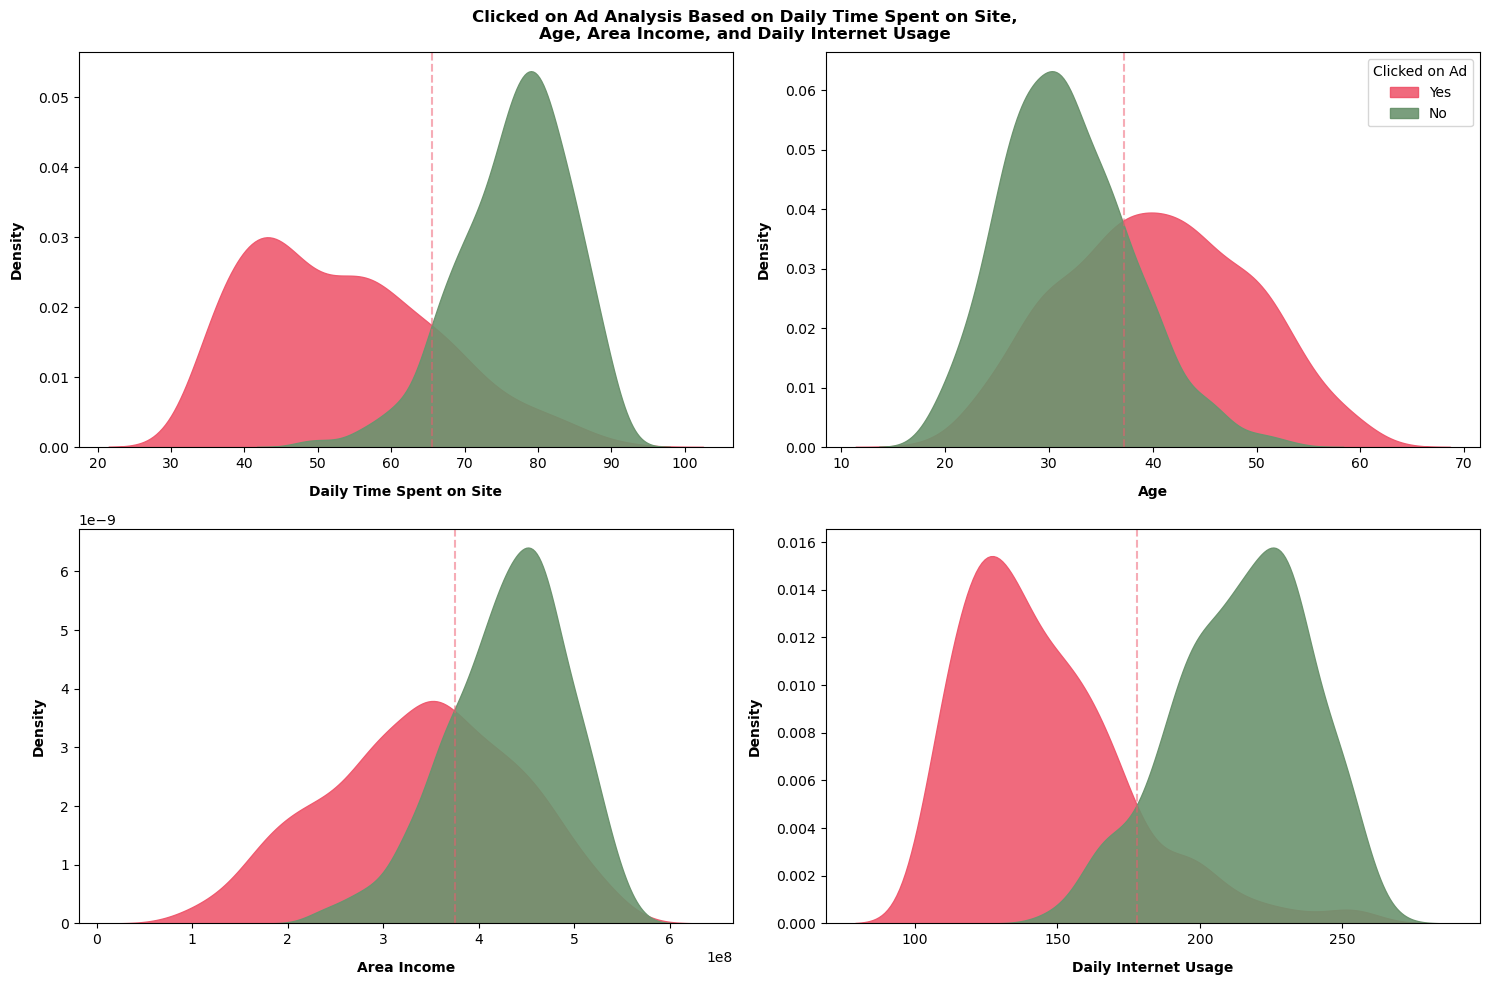

In [20]:
plt.figure(figsize = (15, 10))
num_columns = df_nums.columns
for i in range(len(num_columns)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(data = df[df['Clicked on Ad'] == 'Yes'], x = num_columns[i], color = '#EF5A6F', fill = True, alpha = 0.9)
    sns.kdeplot(data = df[df['Clicked on Ad'] == 'No'], x = num_columns[i], color = '#6C946F', fill = True, alpha = 0.9)
    if i == 0:
        plt.axvline(x = 65.5, ls = '--', color = '#EF5A6F', alpha = 0.5)
    elif i == 1:
        plt.axvline(x = 37.25, ls = '--', color = '#EF5A6F', alpha = 0.5) 
    elif i == 2:
        plt.axvline(x = 375000000, ls = '--', color = '#EF5A6F', alpha = 0.5) 
    else:
        plt.axvline(x = 178, ls = '--', color = '#EF5A6F', alpha = 0.5) 
    
    plt.xlabel(num_columns[i], fontweight = 'bold', labelpad = 10)
    plt.ylabel('Density', fontweight = 'bold', labelpad = 10)
    
    if i == 1:
        plt.legend(title = 'Clicked on Ad', labels=['Yes', 'No'], loc = 'upper right')
        
plt.suptitle('Clicked on Ad Analysis Based on Daily Time Spent on Site,\nAge, Area Income, and Daily Internet Usage', fontweight = 'bold')
plt.tight_layout()
plt.show()

- Semakin banyak waktu yang dihabiskan di situs atau internet (Daily Time Spent on Site), semakin kecil kemungkinan pelanggan mengklik iklan (Clicked on Ad).
- Semakin tua usia pelanggan (Age), semakin besar kemungkinan pelanggan mengklik iklan (Clicked on Ad).
- Semakin tinggi pendapatan wilayah pelanggan (Area Income), semakin kecil kemungkinan pelanggan mengklik iklan (Clicked on Ad).
- Semakin tinggi penggunaan internet harian (Daily Internet Usage), semakin kecil kemungkinan pelanggan akan mengklik iklan (Clicked on Ad).

#### Fitur Kategorikal

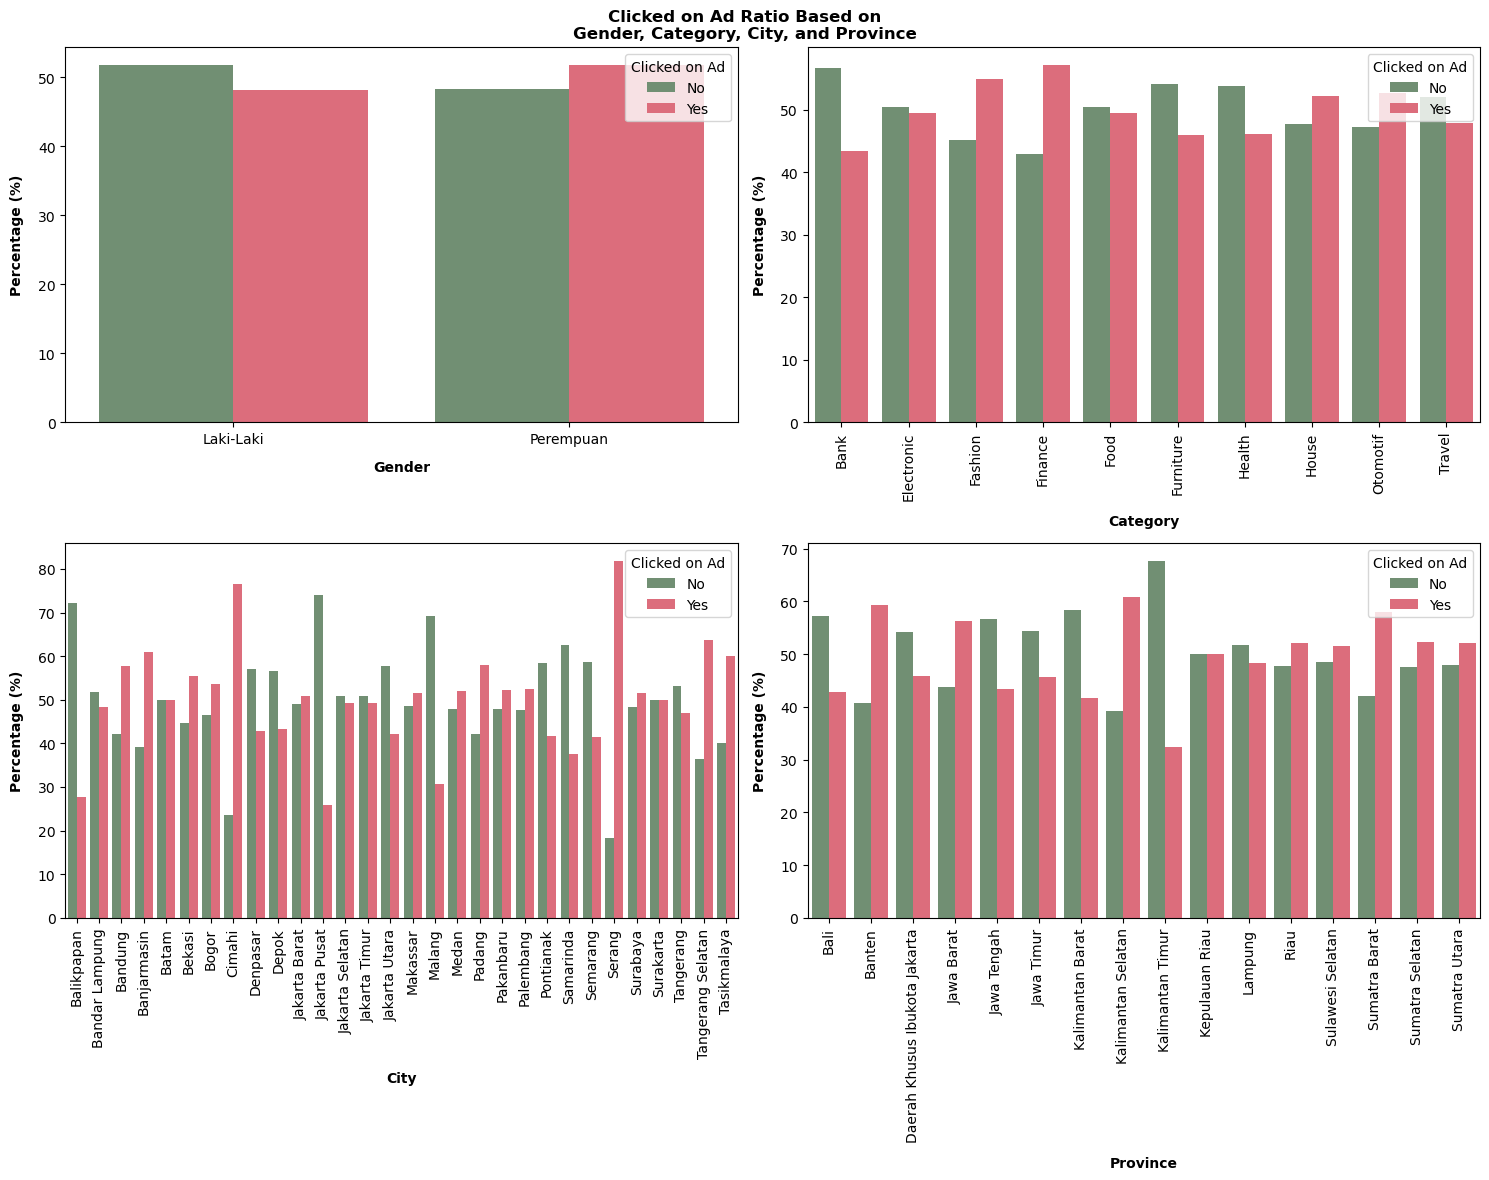

In [23]:
plt.figure(figsize = (15, 12))

cat_columns = ['Gender', 'Category', 'City', 'Province']

for i in range(len(cat_columns)):
    plt.subplot(2, 2, i+1)
    cat_count = df_cats.groupby([cat_columns[i], 'Clicked on Ad']).size().reset_index(name = 'Total')
    cat_count_customer = df_cats.groupby(cat_columns[i]).size().reset_index(name = 'Total Customer')
    cat_count = cat_count.merge(cat_count_customer)
    cat_count['Ratio'] = round(cat_count['Total']/cat_count['Total Customer'] * 100, 2)
    sns.barplot(data = cat_count, x = cat_columns[i], y = 'Ratio', hue = 'Clicked on Ad', palette = ['#6C946F', '#EF5A6F'])
    plt.xlabel(cat_columns[i], fontweight = 'bold', labelpad = 10)
    plt.ylabel('Percentage (%)', fontweight = 'bold', labelpad = 10)
    if i in [1,2,3]:
        plt.xticks(fontsize = 10, rotation = 90)
    plt.legend(title = 'Clicked on Ad', loc = 'upper right')
plt.suptitle('Clicked on Ad Ratio Based on\nGender, Category, City, and Province', fontweight = 'bold')
plt.tight_layout()
plt.show()

- Perempuan memiliki sedikit lebih tinggi kemungkinan untuk mengklik iklan (Click on Ad) dibandingkan Laki-laki.
- Kategori iklan tertinggi yang diklik pengguna adalah Finance dan yang terendah adalah Bank.
- Kota dengan rasio klik tertinggi adalah Serang dan yang terendah adalah Jakarta Pusat.
- Tiga provinsi dengan rasio klik tertinggi adalah Kalimantan Selatan, Banten, dan Sumatra Barat.

#### Bivariate Analysis

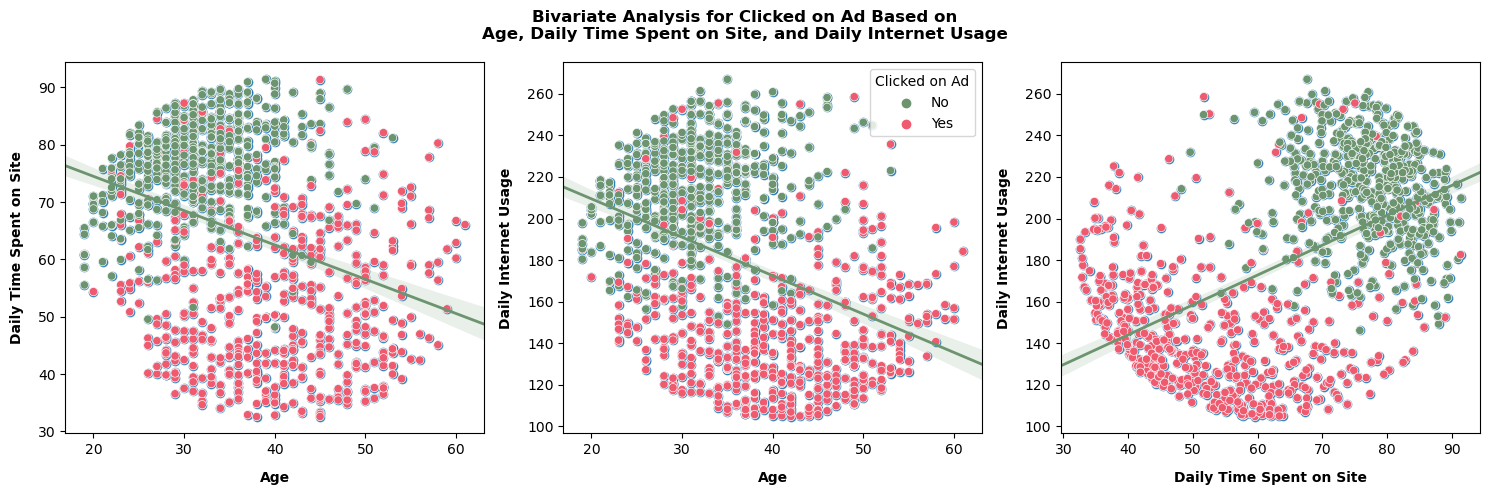

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Membuat trend line
sns.regplot(data = df, x = 'Age', y = 'Daily Time Spent on Site', truncate = False, line_kws={"linewidth": 2, 'color': '#6C946F'}, ax = axs[0])
sns.regplot(data = df, x = 'Age', y = 'Daily Internet Usage', truncate = False, line_kws={"linewidth": 2, 'color': '#6C946F'}, ax = axs[1])
sns.regplot(data = df, x = 'Daily Time Spent on Site', y = 'Daily Internet Usage', truncate = False, line_kws={"linewidth": 2, 'color': '#6C946F'}, ax = axs[2])

# Data visualization
sns.scatterplot(data = df, x = 'Age', y = 'Daily Time Spent on Site', hue = 'Clicked on Ad', palette = ['#6C946F', '#EF5A6F'], ax = axs[0], legend = None)
sns.scatterplot(data = df, x = 'Age', y = 'Daily Internet Usage', hue = 'Clicked on Ad', palette = ['#6C946F', '#EF5A6F'], ax = axs[1])
sns.scatterplot(data = df, x = 'Daily Time Spent on Site', y = 'Daily Internet Usage', hue = 'Clicked on Ad', palette = ['#6C946F', '#EF5A6F'], ax = axs[2], legend = None)

# Adjust x and y label
axs[0].set_xlabel ('Age', fontweight = 'bold', labelpad = 10)
axs[0].set_ylabel ('Daily Time Spent on Site', fontweight = 'bold', labelpad = 10)
axs[1].set_xlabel ('Age', fontweight = 'bold', labelpad = 10)
axs[1].set_ylabel ('Daily Internet Usage', fontweight = 'bold', labelpad = 10)
axs[2].set_xlabel ('Daily Time Spent on Site', fontweight = 'bold', labelpad = 10)
axs[2].set_ylabel ('Daily Internet Usage', fontweight = 'bold', labelpad = 10)
    
plt.suptitle('Bivariate Analysis for Clicked on Ad Based on\nAge, Daily Time Spent on Site, and Daily Internet Usage', fontweight = 'bold')
plt.tight_layout()
plt.show()

- Usia (Age) dengan Daily Time Spent on Site memiliki korelasi negatif. Semakin tua usia pelanggan, maka menunjukkan semakin sedikit waktu yang mereka habiskan di situs.
- Begitu pula dengan usia (Age) dengan Daily Internet Usage yang juga memiliki korelasi negatif. Semakin tua usia pelanggan, maka menunjukkan semakin sedikit waktu pemakaian internet.
- Sementara itu, Daily Time Spent on Site dan Daily Internet Usage memiliki korelasi positif. Semakin banyak waktu yang dihabiskan pelanggan di situs, maka menunjukkan semakin banyak pemakaian internet juga.

### Multivariate Analysis

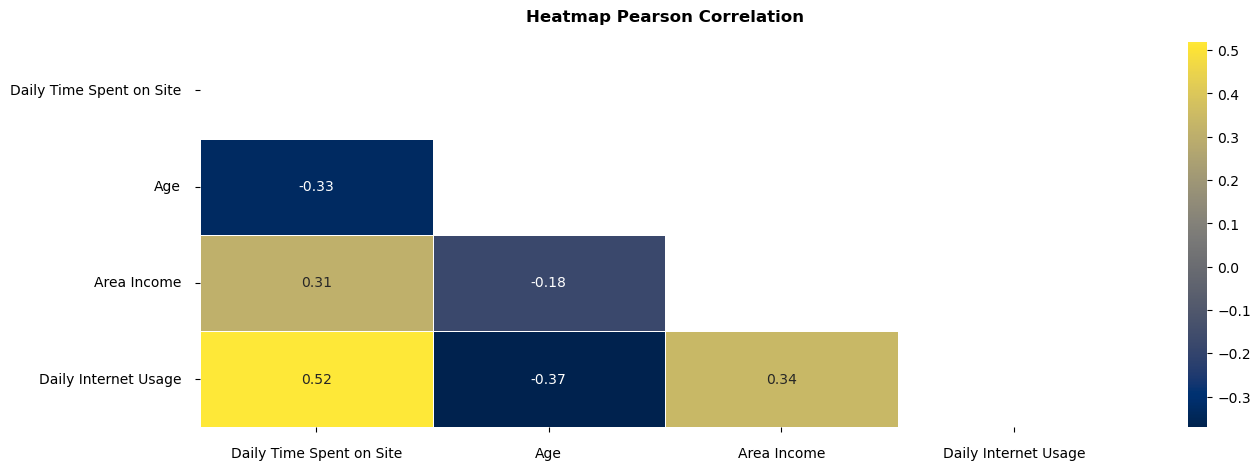

In [29]:
plt.figure(figsize=(15, 5))
mask = np.triu(np.ones_like(df_nums.corr(), dtype=bool))
sns.heatmap(df_nums.corr(), mask=mask, cmap='cividis', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Heatmap Pearson Correlation', fontweight='bold', pad=15)
plt.tick_params(pad=10)
plt.show()

Tidak ada fitur yang redundan atau memiliki korelasi tinggi (>= 0.7) di antara mereka. Oleh karena itu, semua fitur dapat digunakan untuk pemodelan. Namun, dengan menggunakan korelasi Pearson, kita tidak dapat menentukan hubungan antara fitur dan variabel target karena variabel target adalah data kategorikal.

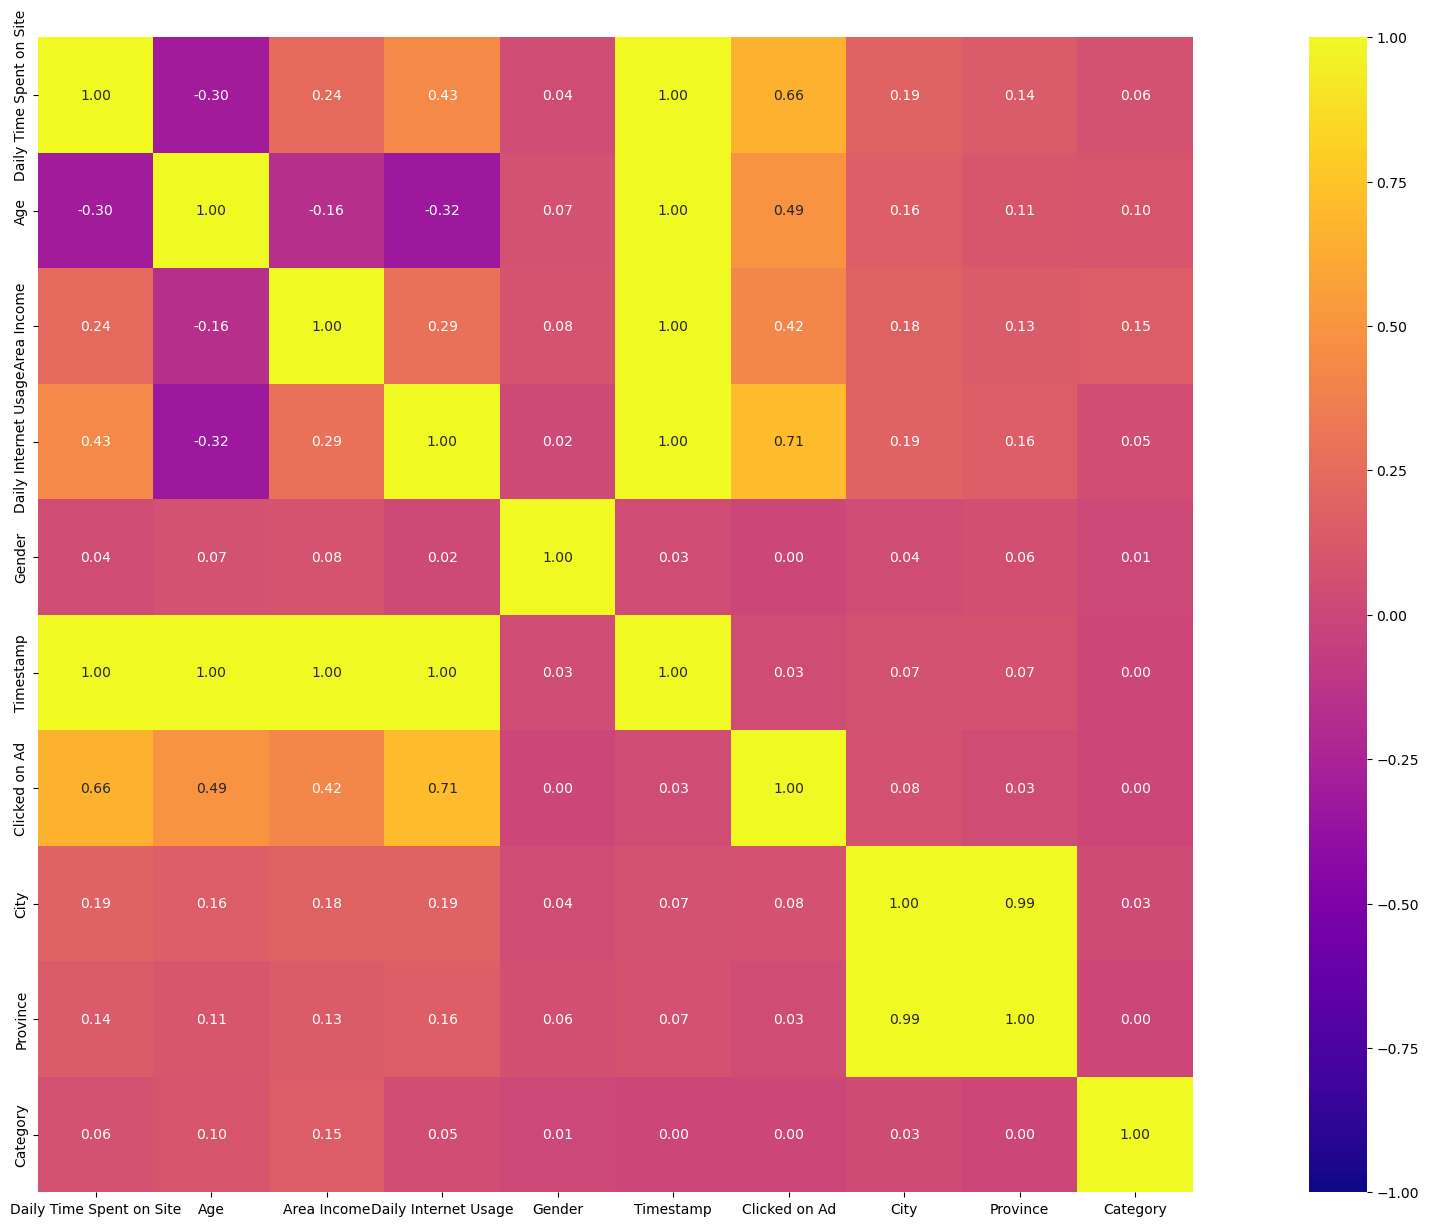

In [31]:
from dython.nominal import associations

# Visualisasi asosiasi antar fitur dalam DataFrame
fig, ax = plt.subplots(figsize=(30, 15))
assoc = associations(df, ax=ax, cmap='plasma')
plt.show()

Berdasarkan heatmap di atas, fitur-fitur yang berhubungan dengan variabel target (Clicked on Ad) dan akan digunakan untuk pemodelan antara lain: **Age, Area Income, Daily Internet Usage, dan Daily Time Spent on Site** karena memiliki nilai korelasi yang cukup tinggi dengan variabel target (Click on Ad).

# DATA PREPROCESSING

### Handling Missing Value

In [35]:
df.isna().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Gender                       3
Timestamp                    0
Clicked on Ad                0
City                         0
Province                     0
Category                     0
dtype: int64

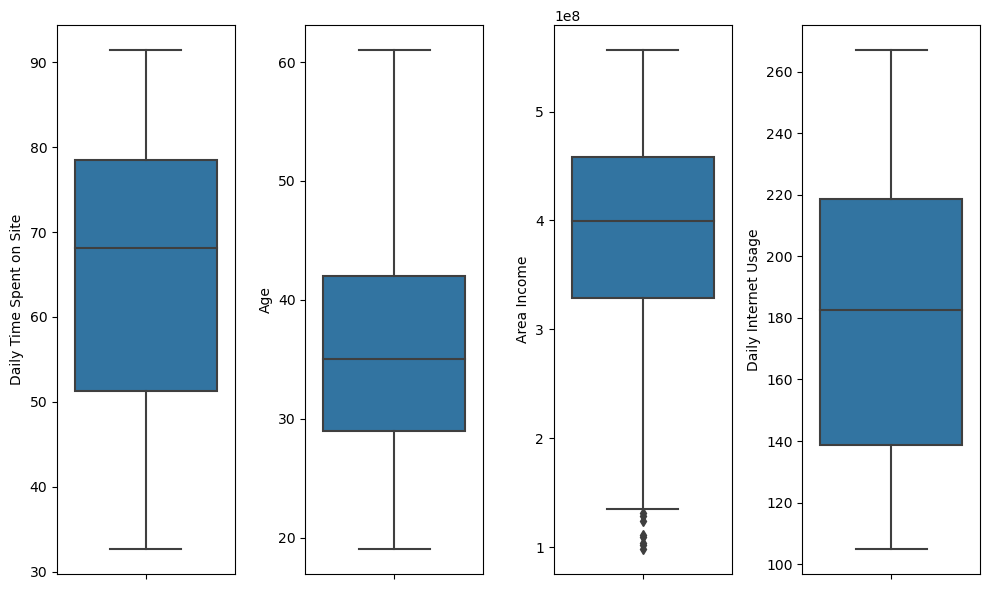

In [36]:
# Membuat boxplot untuk setiap kolom numerik
plt.figure(figsize=(10, 6))
features = df_nums.columns
for i in range(0, len(features)):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df_nums[features[i]])
    plt.tight_layout()

In [37]:
# Handling menggunakan mean karena tidak memiliki outlier
df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean(), inplace = True)
df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean(), inplace = True)

# Handling menggunakan median karena terdapat outlier
df['Area Income'].fillna(df['Area Income'].median(), inplace = True)

### Handling Duplicated Data

In [39]:
df.duplicated().sum()

0

Tidak terdapat data duplikat, sehingga tidak perlu dilakukan handling.

### Feature Encoding

In [42]:
df_enc = df.copy()

In [43]:
df_enc['Clicked on Ad'] = df_enc['Clicked on Ad'].replace({'No': 0, 'Yes': 1})

In [44]:
df_enc.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,City,Province,Category
71,69.01,46,521806670.0,222.63,Perempuan,7/7/2016 13:37,0,Bogor,Jawa Barat,Fashion
867,90.75,40,321621160.0,216.50,Perempuan,3/11/2016 9:58,0,Jakarta Utara,Daerah Khusus Ibukota Jakarta,Finance
142,55.60,44,461676320.0,124.38,Laki-Laki,6/14/2016 11:59,1,Bekasi,Jawa Barat,Finance
947,38.65,31,362688970.0,154.77,Laki-Laki,5/24/2016 9:50,1,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Bank
943,39.30,32,338346400.0,145.73,Perempuan,2/24/2016 4:11,1,Bandung,Jawa Barat,House


### Feature Extraction

In [46]:
df_enc['Timestamp'] = pd.to_datetime(df_enc['Timestamp'])

In [47]:
import datetime as dt
from datetime import date

df_enc['Year'] = df_enc['Timestamp'].dt.year
df_enc['Month'] = df_enc['Timestamp'].dt.month
df_enc['Week'] = df_enc['Timestamp'].dt.isocalendar().week
df_enc['Day'] = df_enc['Timestamp'].dt.day

In [48]:
df_enc.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,City,Province,Category,Year,Month,Week,Day
0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,2016,3,12,27
1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,0,Denpasar,Bali,Food,2016,4,14,4
2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,0,Surabaya,Jawa Timur,Electronic,2016,3,10,13
3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,0,Batam,Kepulauan Riau,House,2016,1,1,10
4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,0,Medan,Sumatra Utara,Finance,2016,6,22,3


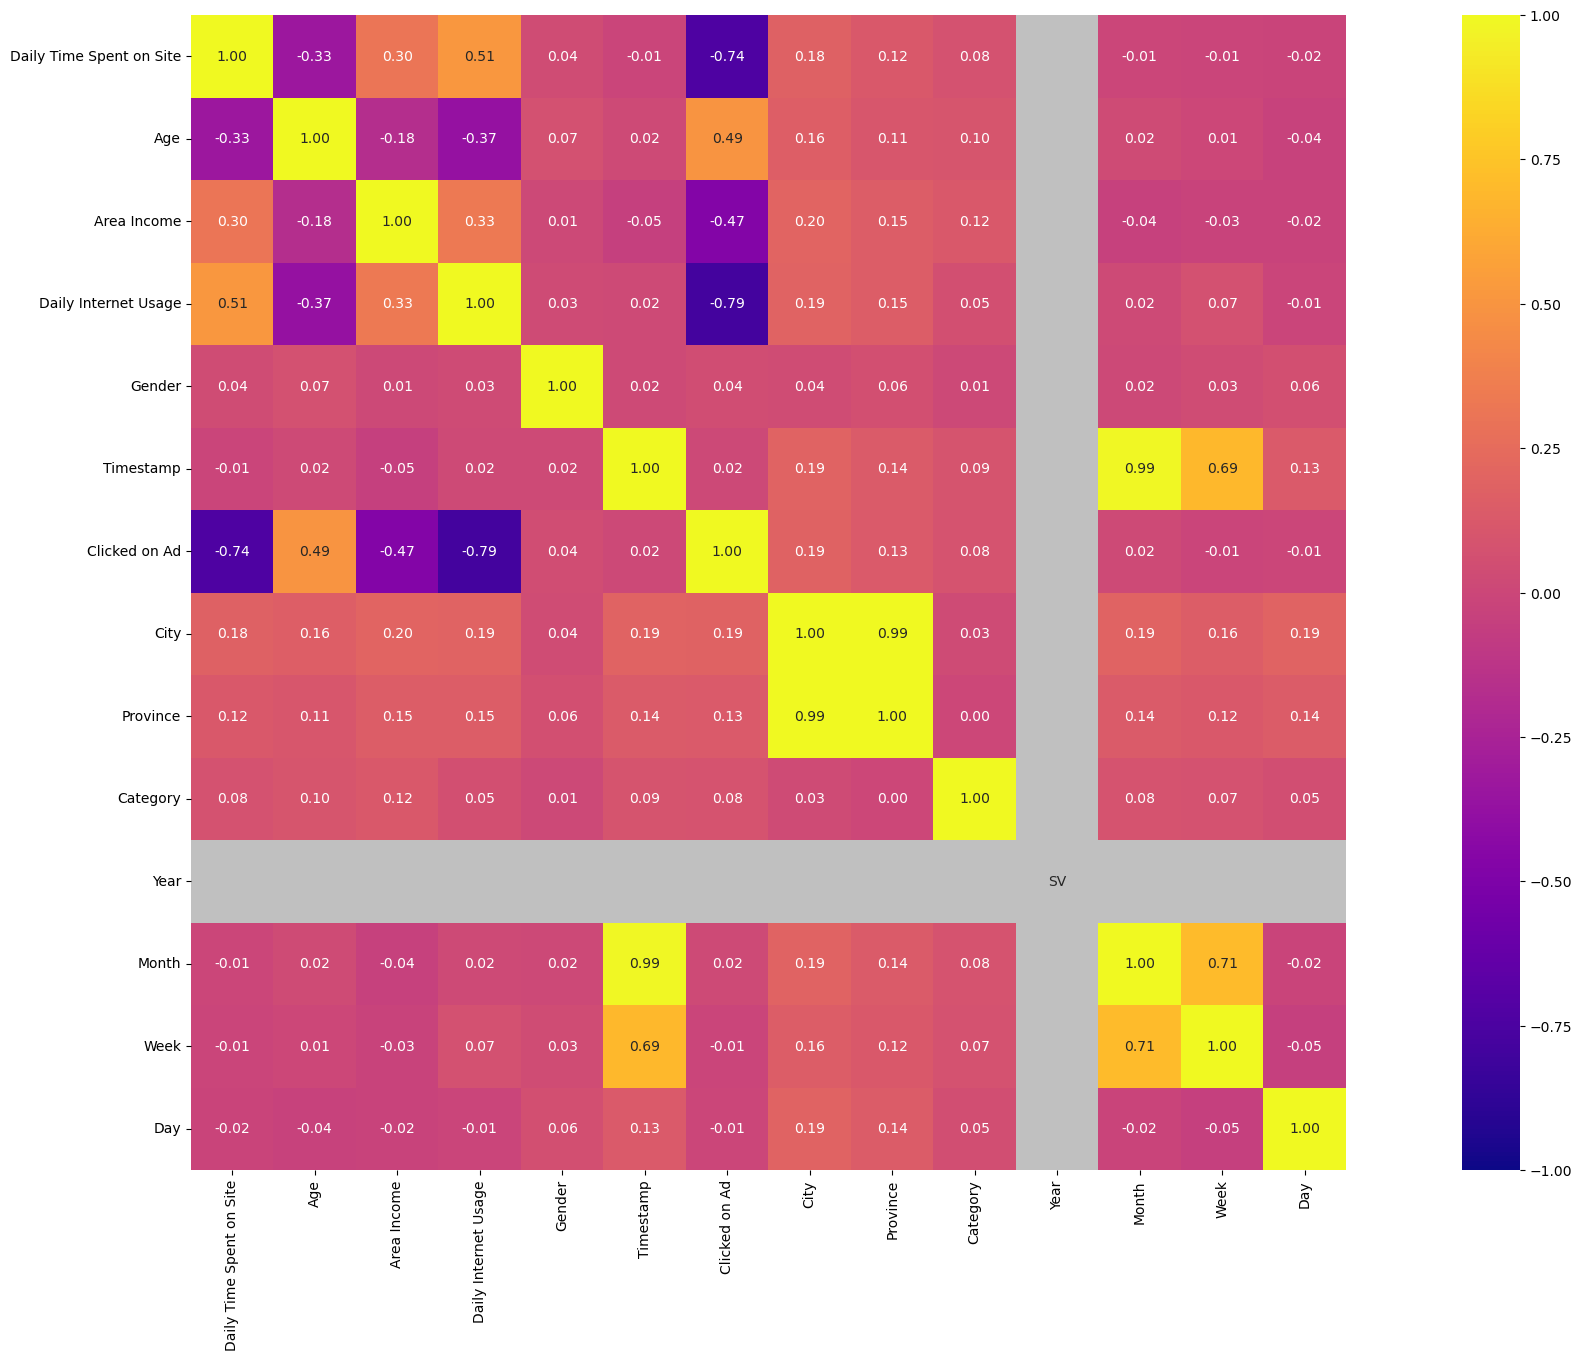

In [49]:
# Visualisasi asosiasi antar fitur dalam DataFrame
fig, ax = plt.subplots(figsize=(30, 15))
assoc = associations(df_enc, ax=ax, cmap='plasma')
plt.show()

Tidak ada korelasi antara variabel target (Clicked on Ad) dengan fitur Year, Month, Week, maupun Day. Sehingga fitur yang digunakan dalam pemodelan tetap hanya Clicked on Ad, Age, Daily Time Spent on Site, Area Income, dan Daily Internet Usage.

### Feature Selection

In [52]:
data = df_enc[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Clicked on Ad']]

In [53]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,68.95,35,432837300.0,256.09,0
1,80.23,31,479092950.0,193.77,0
2,69.47,26,418501580.0,236.50,0
3,74.15,29,383643260.0,245.89,0
4,68.37,35,517229930.0,225.58,0


### Split Data

In [55]:
from sklearn.model_selection import train_test_split

X = data.drop(columns = 'Clicked on Ad')
y = data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f'Data train : {X_train.shape[0]} rows')
print(f'Data test  : {X_test.shape[0]} rows')

Data train : 700 rows
Data test  : 300 rows


### Handling Outlier - Menggunakan IQR

In [57]:
print(f"Before handling outlier: {len(X_train)}")

# Merge data train
train = X_train.join(y_train)

# Hitung IQR
q1 = np.percentile(train['Area Income'], 25)
q3 = np.percentile(train['Area Income'], 75)
iqr = q3 - q1

# Hitung batas atas dan batas bawah
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter data
train = train[(train['Area Income'] >= lower_bound) & (train['Area Income'] <= upper_bound)]

# Split the data train
X_train = train.drop(columns = 'Clicked on Ad')
y_train = train['Clicked on Ad']
    
print(f"After handling outliers: {len(X_train)}")

Before handling outlier: 700
After handling outliers: 689


### Feature Transformation - Normalization

In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# DATA MODELING

In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
import time

def evaluate_model(X_train, X_test, y_train, y_test, model, hyperparameters, cv=5, scoring_fit='accuracy'):
    gs = GridSearchCV(estimator=model, param_grid=hyperparameters, cv=cv, n_jobs=-1, scoring=scoring_fit, 
                      verbose=0, error_score='raise')
    
    start = time.time()
    try:
        gs.fit(X_train, y_train)
    except Exception as e:
        print(f"An error occurred during fitting: {e}")
        return [None, None, None, None]
    
    y_predict = gs.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    end = time.time()

    return [accuracy, precision, recall, (end-start)]

grid_parameters = [
    # Decision Tree
    {
        'max_features': ['sqrt', 'log2'],
        'max_depth' : [2, 4, 6, 7, 8],
        'min_samples_split' : [2, 5], 
        'min_samples_leaf' : [1, 2] 
    },      
    # AdaBoost
    {
        'learning_rate': [0.001, 0.01, 1],
        'n_estimators': [20, 60, 80],
        'algorithm' : ['SAMME.R', 'SAMME']
    }, 
    # Logistic regression
    {
        'penalty' : ['l2'],
        'C' : [0.0001, 0.001, 0.002],
        'solver' : ['newton-cg', 'lbfgs'],
        'multi_class' : ['multinomial']
    },
    # Logistic regression with elasticnet
    {
        'penalty' : ['elasticnet'],
        'C' : [0.0001, 0.001, 0.002],
        'solver' : ['saga'],
        'multi_class' : ['multinomial'],
        'l1_ratio': [0.5]  # Required when using 'elasticnet' penalty
    }, 
    # KNearestNeighbor
    {
        'leaf_size': list(range(1,100)),
        'n_neighbors': list(range(1,100)),
        'p': [1,2,3],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    }
]

### Non-Normalization Data

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [101]:
dt = DecisionTreeClassifier(random_state = 42)
ada = AdaBoostClassifier(random_state = 42)
lr = LogisticRegression(random_state = 42)
lr_elasticnet = LogisticRegression(random_state = 42, solver='saga')
knn = KNeighborsClassifier()

# Create the models list
models = [dt, ada, lr, lr_elasticnet, knn]

#### Model Evaluation

In [103]:
models_predict = []

In [105]:
# Hyperparameter tuning
for i, model in enumerate(models):
    hyperparameters = grid_parameters[i]
    result = evaluate_model(X_train, X_test, y_train, y_test, model, hyperparameters, cv=5, scoring_fit='accuracy')
    models_predict.append(result)

In [109]:
# Membuat dataframe untuk metrics
df_models = pd.DataFrame({'Model': ['Decision Tree', 'AdaBoost', 'Logistic Regression', 
                                    'Logistic Regression (Elasticnet)', 'KNNeighbors']})
df_result = pd.DataFrame(data = models_predict, columns = ['Accuracy', 'Precision', 'Recall', 'Time Elapsed'])
df_metrics = df_models.join(df_result)
df_metrics = df_metrics.sort_values('Accuracy', ascending = False, ignore_index = True)

df_metrics

,Model,Accuracy,Precision,Recall,Time Elapsed
0,Decision Tree,0.953333,0.972973,0.935065,5.460287
1,AdaBoost,0.943333,0.941935,0.948052,3.199852
2,KNNeighbors,0.680000,0.750000,0.564935,2091.753802
3,Logistic Regression,0.486667,0.000000,0.000000,0.683123
4,Logistic Regression (Elasticnet),0.486667,0.000000,0.000000,0.046180


- Model Decision Tree memiliki akurasi tertinggi.
- Model Logistic Regression baik tanpa maupun menggunakan elasticnet memiliki akurasi terendah, namun keduanya memiliki waktu eksekusi tercepat.
- Model KNNeighbors membutuhkan waktu eksekusi yang paling lama.
- Jadi, berdasarkan accuracy value, model yang memiliki performa terbaik adalah **Decision Tree** dan **AdaBoost**.

### Normalization Data

In [118]:
models_predict_norm = []

In [120]:
# Hyperparameter tuning
for i, model in enumerate(models):
    hyperparameters = grid_parameters[i]
    result_scaled = evaluate_model(X_train_scaled, X_test_scaled, y_train, y_test, model, hyperparameters, cv=5, scoring_fit='accuracy')
    models_predict_norm.append(result_scaled)

In [123]:
# Membuat dataframe untuk metrics
df_models = pd.DataFrame({'Model': ['Decision Tree', 'AdaBoost', 'Logistic Regression', 
                                    'Logistic Regression (Elasticnet)', 'KNNeighbors']})
df_result_scaled = pd.DataFrame(data = models_predict_norm, columns = ['Accuracy (Normalized)', 'Precision (Normalized)', 'Recall (Normalized)', 'Time Elapsed (Normalized)'])
df_metrics_scaled = df_models.join(df_result_scaled)
df_metrics_scaled = df_metrics_scaled.sort_values('Accuracy (Normalized)', ascending = False, ignore_index = True)

df_metrics_scaled

,Model,Accuracy (Normalized),Precision (Normalized),Recall (Normalized),Time Elapsed (Normalized)
0,KNNeighbors,0.956667,0.986207,0.928571,2735.483490
1,Decision Tree,0.953333,0.972973,0.935065,5.304255
2,AdaBoost,0.943333,0.941935,0.948052,2.343205
3,Logistic Regression,0.926667,1.000000,0.857143,0.121019
4,Logistic Regression (Elasticnet),0.513333,0.513333,1.000000,0.047342


- Setelah dataset dinormalisasi, terjadi perubahan signifikan dalam kinerja model berbasis jarak.
- Model dengan performa terbaik berubah menjadi model **KNNeighbors**.
- Model dengan performa terburuk tetap Logistic Regression, baik tanpa maupun dengan elasticnet, meskipun kinerjanya meningkat secara signifikan.
- Waktu terlama yang diperlukan masih terjadi pada model KNNeighbors.
- Jadi, berdasarkan accuracy value setelah dataset dinormalisasi, model yang memiliki performa terbaik adalah **KNNeighbors** dan **Decision Tree**.

### Comparing Non-Normalization and Normalization Dataset

In [132]:
df_comparison = df_metrics_scaled.merge(df_metrics)

columns_comp = ['Accuracy', 'Precision', 'Recall', 'Time Elapsed']
for i in columns_comp:
    df_comparison[f'Δ {i}'] = df_comparison[f'{i} (Normalized)'] - df_comparison[i]

df_comparison = df_comparison[['Model', 'Accuracy', 'Accuracy (Normalized)', 'Δ Accuracy', 
                               'Precision', 'Precision (Normalized)', 'Δ Precision', 
                               'Recall', 'Recall (Normalized)', 'Δ Recall', 
                               'Time Elapsed', 'Time Elapsed (Normalized)', 'Δ Time Elapsed']]
df_comparison

,Model,Accuracy,Accuracy (Normalized),Δ Accuracy,Precision,Precision (Normalized),Δ Precision,Recall,Recall (Normalized),Δ Recall,Time Elapsed,Time Elapsed (Normalized),Δ Time Elapsed
0,KNNeighbors,0.680000,0.956667,0.276667,0.750000,0.986207,0.236207,0.564935,0.928571,0.363636,2091.753802,2735.483490,643.729689
1,Decision Tree,0.953333,0.953333,0.000000,0.972973,0.972973,0.000000,0.935065,0.935065,0.000000,5.460287,5.304255,-0.156031
2,AdaBoost,0.943333,0.943333,0.000000,0.941935,0.941935,0.000000,0.948052,0.948052,0.000000,3.199852,2.343205,-0.856647
3,Logistic Regression,0.486667,0.926667,0.440000,0.000000,1.000000,1.000000,0.000000,0.857143,0.857143,0.683123,0.121019,-0.562104
4,Logistic Regression (Elasticnet),0.486667,0.513333,0.026667,0.000000,0.513333,0.513333,0.000000,1.000000,1.000000,0.046180,0.047342,0.001162


- Secara keseluruhan, semua model berkinerja lebih baik setelah dataset **dinormalisasi** berdasarkan evaluasi metrik dan juga waktu yang diperlukan lebih singkat.
- Model yang dipilih adalah model **Decision Tree** karena memiliki salah satu akurasi tertinggi dan proses komputasi yang cepat.

### Confusion Matrix

In [139]:
dt = DecisionTreeClassifier(random_state = 42)

hyperparameters =  {'max_features': ['sqrt', 'log2'],
                    'max_depth' : [2, 4, 6, 7, 8],
                    'min_samples_split' : [2, 5], 
                    'min_samples_leaf' : [1, 2]}

gs = GridSearchCV(estimator = dt, param_grid = hyperparameters, cv = 5, n_jobs = -1, scoring = 'accuracy', verbose = 0)
gs.fit(X_train_scaled, y_train)

# Best hyperparameters for Decision Tree
best_params = gs.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}


Parameter terbaik pada model Decision Tree, antara lain:
- Maximal depth = 6
- Maximal features = sqrt
- Minimal samples leaf = 1
- Minimal samples split = 5

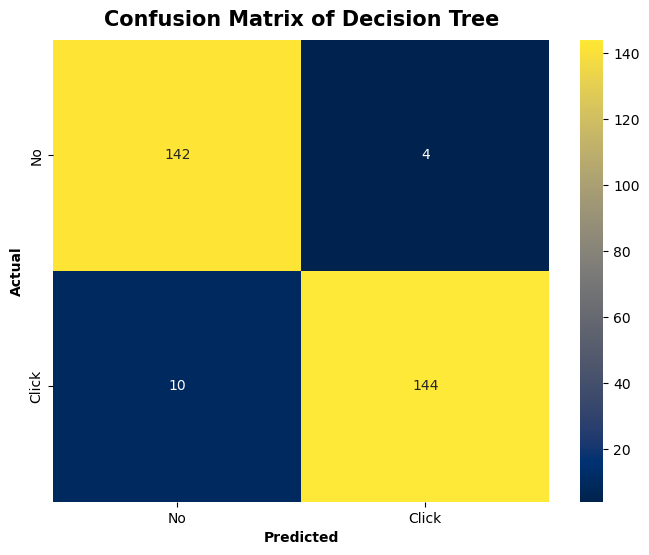

In [151]:
from sklearn.metrics import confusion_matrix

dt = DecisionTreeClassifier(max_depth = 6, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 5, random_state = 42)

# Model training
dt.fit(X_train_scaled, y_train)

# Model predictions
y_pred = gs.predict(X_test_scaled)

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "cividis", xticklabels= ['No', 'Click'], yticklabels=['No', 'Click'])
plt.title('Confusion Matrix of Decision Tree', pad = 10, fontweight = 'bold', fontsize = 15)
plt.xlabel('Predicted', fontweight = 'bold')
plt.ylabel('Actual', fontweight = 'bold')
plt.show()

Dengan menggunakan hasil tuning hyperparameter untuk model Decision Tree, kita melatih model kembali untuk mendapatkan confusion matrix seperti yang ditunjukkan di atas, dengan hasil sebagai berikut:
- True Positive (TP): Diprediksi akan mengklik iklan dan ternyata benar sebanyak 144 kali.
- True Negative (TN): Diprediksi tidak akan mengklik iklan dan ternyata benar sebanyak 142 kali.
- False Positive (FP): Diprediksi akan mengklik iklan dan ternyata salah sebanyak 4 kali.
- False Negative (FN): Diprediksi tidak akan mengklik iklan dan ternyata salah sebanyak 10 kali.

### Features Importance

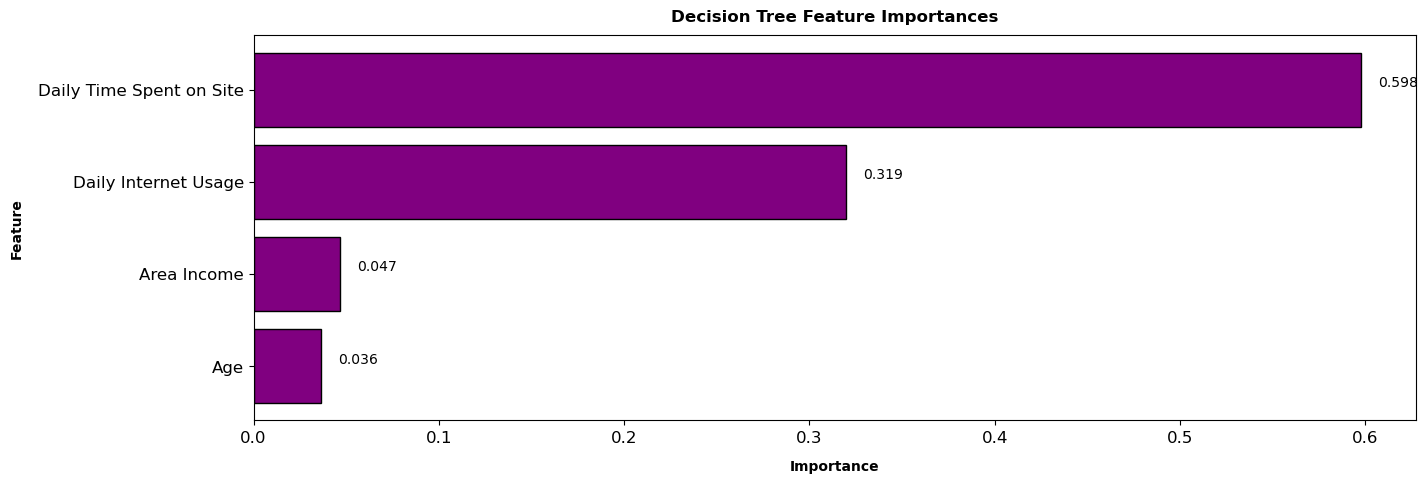

In [162]:
feature_importances = dt.feature_importances_
features = X_train.columns

df_feature_importance = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
df_feature_importance.sort_values('Importance', inplace = True)

plt.figure(figsize = (15, 5))
bars = plt.barh(df_feature_importance['Feature'], df_feature_importance['Importance'], color='purple', linewidth = 1, edgecolor = 'black')
plt.xlabel('Importance', fontweight = 'bold', labelpad = 10)
plt.ylabel('Feature', fontweight = 'bold', labelpad = 10)
plt.title('Decision Tree Feature Importances', fontweight = 'bold', pad = 10)
plt.xticks(rotation = 0, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12)

for bar, label in zip(bars, df_feature_importance['Importance']):
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2, f'{label:.3f}', ha='center', va='bottom')
plt.show()

Waktu yang dihabiskan setiap hari di situs web (**Daily Time Spent on Site**) adalah fitur yang **paling penting**, diikuti oleh penggunaan internet harian (**Daily Internet Usage**) di tempat kedua yang menentukan apakah pengguna mengklik iklan atau tidak.

# Business Recommendation

Berdasarkan insight dari Exploratory Data Analysis (EDA) dan feature importances, berikut adalah rekomendasi bisnis yang dapat diberikan:

**1. Optimalisasi Konten**
<br>
Karena semakin tinggi **Daily Time Spent on Site** dan **Daily Internet Usage**, semakin kecil kemungkinan pengguna akan mengklik iklan, maka kita perlu membuat konten iklan yang menarik dan relevan untuk pengguna target. Pastikan pesan dan visual iklan sesuai dengan minat dan kebutuhan pengguna. Yaitu dengan cara:
- Menggunakan gambar dan video yang menarik perhatian.
- Membuat headline yang kuat dan relevan.
- Menyediakan konten yang menawarkan nilai tambah bagi pengguna, seperti informasi yang berguna atau penawaran khusus.

**2. Strategi Harga Terarah**
<br>
Karena semakin rendah **Area Income**, semakin besar kemungkinan pengguna akan mengklik iklan, kita dapat menerapkan strategi harga yang sesuai dengan tingkat pendapatan target audiens. Yaitu dengan cara:
- Membuat tingkat harga khusus yang lebih terjangkau.
- Menawarkan diskon atau bundling produk/jasa.
- Mengembangkan dan mempromosikan produk atau jasa yang terjangkau untuk pengguna dengan pendapatan rendah.

**3. Kampanye Pemasaran Berbasis Usia**
<br>
Karena semakin tua (**Age**) pengguna, semakin besar kemungkinan mereka akan mengklik iklan, kita dapat mengembangkan kampanye pemasaran yang secara khusus dirancang untuk menarik demografi yang lebih tua. Yaitu dengan cara:
- Menciptakan pesan, visual, dan penawaran yang sesuai dengan preferensi dan minat pengguna yang lebih tua.
- Menggunakan saluran pemasaran yang lebih banyak digunakan oleh demografi ini, seperti email atau media sosial tertentu.
- Menyoroti manfaat produk/jasa yang lebih relevan dengan kebutuhan pengguna yang lebih tua.

# Business Simulation

**Asumsi**
<br> Cost per Mille (CPM) = Rp100,000
<br> Revenue per Ad Clicked = Rp3,000

### Simulasi bisnis tanpa menggunakan hasil dari model machine learning

- **Jumlah pengguna yang ditargetkan**
<br> User = 1,000
- **Click-Through Rate (CTR):**
<br> CTR = 500/1,000 = 0.5
- **Total Cost**:
<br> CPM = Rp100,000
- **Total Revenue**:
<br> Total Revenue = CTR x Jumlah pengguna yang ditargetkan x Revenue per Ad Clicked = 0.5 x 1,000 x 3,000 = Rp1,500,000
- **Total Profit**:
<br> Total Profit = Total Revenue - Total Cost = Rp1,500,000 - Rp100,000 = Rp1,400,000

### Simulasi bisnis dengan menggunakan hasil dari model machine learning

- **Jumlah pengguna yang ditargetkan**
<br> User = 1,000
- **Click-Through Rate (CTR):**
<br> Accuracy = 0.95
- **Total Cost**:
<br> CPM = Rp100,000
- **Total Revenue**:
<br> Total Revenue = CTR x Jumlah pengguna yang ditargetkan x Revenue per Ad Clicked = 0.95 x 1,000 x 3,000 = Rp2,850,000
- **Total Profit**:
<br> Total Profit = Total Revenue - Total Cost = Rp2,850,000 - Rp100,000 = Rp2,750,000

### Ringkasan

|  | Tanpa ML | Dengan ML | 
| :- | :- | :- |
| Jumlah Pengguna yang Ditargetkan | 1000 | 1000 | 
| Revenue per Ad Clicked | Rp3,000 | Rp3,000 |
| CPM | Rp100,000 | Rp100,000 | 
| CTR  | 0.5 | 0.95 |
| Total Revenue | Rp1,500,000 | Rp2,850,000 | 
| Total Profit | Rp1,400,000 | Rp2,750,000 |

# Kesimpulan

Dari hasil di atas, terlihat bahwa setelah menggunakan model machine learning, performa iklan meningkat. Click-Through Rate (CTR) meningkat dari 50% menjadi 95% dan total keuntungan meningkat sebesar 96,4% dari Rp1,400,000 menjadi Rp2,750,000.